In [1]:
# Spectrogram visualization functions:
p = "/home/vitek/Vitek/python_codes/ox_audio_analysis_animals/BuffaloKillDemo/DeploymentData/"
#path_full_audio_track = p+"BuffaloKillResampled/08/hq_1528419200.wav"
path_full_audio_track = p+"BuffaloKillResampled/07/hq_1528419100.wav"
#path_single_saved_event = p+"BuffaloKillResampled/extracts/8_1528419100_43.wav"


In [2]:
import librosa
import librosa.display
import numpy as np

def visualize_spectrogram(audio_signal, ch=0, do_mono=False, x_axis='time', 
                          y_axis='linear',  **kwargs):
    if do_mono:
        audio_signal = audio_signal.to_mono(overwrite=False)
    
    data = librosa.amplitude_to_db(np.abs(audio_signal.stft()), ref=np.max)
    librosa.display.specshow(data[..., ch], x_axis=x_axis, y_axis=y_axis, 
        sr=audio_signal.sample_rate, hop_length=audio_signal.stft_params.hop_length,
        **kwargs) 

y, sr = librosa.load(path_full_audio_track)
print(y.shape)

##visualize_spectrogram(y)

(2205000,)


# Pipeline
 
This is a complete pipeline for extracting events, matching them across loggers and outputting position estimates. Simply set up the world parameters, point to a directory and it will process and analyze everything needed.

* Here we process all the data from the buffalo kill dataset. This consists of a surveyed (ground-truth) final kill location, and audio data from 4 loggers. We use this data to validate the pipeline.

* UPDATE: APRIL 2019: This script has been modified to use the coherence detector to find events in the source file

In [ ]:
# note for running this locally:
# dont forget to:
#conda activate caracal_env

### Libraries
Import all the libraries that we need

In [3]:
# We use this magic to force modules to reload everytime we run the script. This allows us to make changes to the module library
%load_ext autoreload
%autoreload 2
# Because the notebooks are in a different directory to the shumba library, we use a bit of magic to append the module path
# to the python path
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
# we can now include the libraries we need
from shumba import shumbacore
from shumba import audiocore
from shumba import extract
from shumba import match
from shumba import position

rawAudio.shape (4410000, 4)
DEBUG: 1816440 1992844
rawAudio.shape (176404, 4)


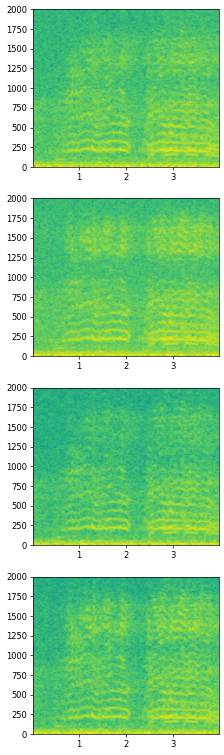

In [5]:
from shumba import audiocore
import pylab as plt

## Load from files:
fileopener = audiocore.AudioFile(None)
rawAudio = fileopener._load_file(path_full_audio_track) # 4 channel
#rawAudio = fileopener._load_file(path_single_saved_event) # 1 channel


## Load from objects:
#coarse_timestamp = 1528419200
#tmp_logger = logger7
#opener = audiocore.AudioFile(tmp_logger)
#rawAudio = opener.loadAtTime(coarse_timestamp)
print("rawAudio.shape",rawAudio.shape)


## Simulate crop by crop parsing:
# event 8 should have -> DEBUG (range) 1816439 1992839
                       # it has DEBUG: 1816440 1992844 -> seems ok, should match



simulate_crop = True
k = 1904640 # 8th event
#k = 2150400 # 11th
#k = 2232320 # 12th

event_length = 176400 # 176400 / 44100 = 4 sec

window = 4096

event_length = 4
Fs = 44100
mid_len = int((event_length / 2) * Fs)

prep = mid_len
post = mid_len
"""
    snippet = audio[k:k+self.window,:]
    Detected: 8 = 1904640 1908736 (4096, 4)
    Detected: 9 = 1986560 1990656 (4096, 4)
    Detected: 10 = 2068480 2072576 (4096, 4)
    Detected: 11 = 2150400 2154496 (4096, 4)
    Detected: 12 = 2232320 2236416 (4096, 4)

    ...
    4407296 = 4407296 4411392 (2704, 4) < last one is shorter
"""
if simulate_crop:
    """
    util = audiocore.AudioUtility()
    filtAudio = util.detrend(rawAudio)
    hpAudio = util.highpassFilter(filtAudio)
    lpAudio = util.lowpassFilter(hpAudio,2000.)

    
    snippet = lpAudio[k-prep:k+event_length+post,:]
    """
    snippet = rawAudio[k-prep:k+event_length+post,:]
    print("DEBUG:", k-prep, k+event_length+post)
    rawAudio = snippet

viz = audiocore.AudioViz()

print("rawAudio.shape",rawAudio.shape)

#plt.figure(figsize=(8, 6), dpi=180)
fig = plt.figure(figsize=(4, 4*4), dpi=60)
viz.plotSpectrogram(rawAudio)

"""
if False:
    l = rawAudio.shape[0]
    parta, partb = [a * (l / window) / (a+1+b), (b+1) * (l / window) / (a+1+b)]
    tmpa, tmpb = plt.xlim() #(0.034013605442176874, 1.8979591836734695)
    # 0-a is previous audio, a-b is the event, b-end is the post audio
    #for ax in allaxes:
    plt.axvline(x=tmpa + (parta) * (tmpb - tmpa) / float((a+1+b)))
    plt.axvline(x=tmpa + (partb) * (tmpb - tmpa) / float((a+1+b)))
"""

plt.show()

#plt.figure(figsize=(8, 6), dpi=180)
#viz.plotSpectrolines(rawAudio,spacing=0.05,low_band=10,high_band=200,step=2)
#plt.show()

(176404, 4)
(2049, 158)
(2049,)
(158,)
AxesImage(54,36;334.8x217.44)


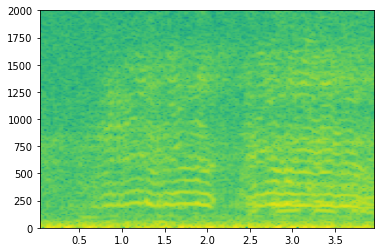

In [16]:
import numpy
import pylab
def explore_spectrogram_data(data,show=False, Fs=44100):
        # Plot 4 channel spectrogram
        if len(numpy.shape(data)) > 1:
            if numpy.shape(data)[1] == 4:
                for k in range(numpy.shape(data)[1]):
                    pylab.subplot(numpy.shape(data)[1],1,k+1)
                    returned = pylab.specgram(data[:,k],Fs=Fs,NFFT=4096,noverlap=3000)
                    pylab.ylim(0,2000)
        else:
            returned = pylab.specgram(data,Fs=Fs,NFFT=4096,noverlap=3000)
            pylab.ylim(0,2000)
        if show is True:
            pylab.show()
        return returned

print(rawAudio.shape)
spectrum, freqs, t, im = explore_spectrogram_data(rawAudio[:,0])
print(spectrum.shape)
print(freqs.shape)
print(t.shape)
print(im)

In [28]:
#Another library for spectrograms
import librosa


#filename = librosa.util.example_audio_file()
#y, sr = librosa.load(filename)
#y = y[:176404] # shorten audio a bit for speed

y = rawAudio[:,0]

window_size = 4096
window = np.hanning(window_size)
stft  = librosa.core.spectrum.stft(y, n_fft=window_size, hop_length=512, window=window)
out = 2 * np.abs(stft) / np.sum(window)

print(out.shape)

#import pylab as plt
#plt.imshow(out)
#plt.show()

# For plotting headlessly
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

fig = plt.Figure()
canvas = FigureCanvas(fig)
ax = fig.add_subplot(111)
p = librosa.display.specshow(librosa.amplitude_to_db(out, ref=np.max), ax=ax, y_axis='log', x_axis='time')
fig.savefig('spec.png')
#plt.show()

(2049, 345)


In [161]:
mid_len

88200

In [165]:
window, Fs, window/Fs

(4096, 44100, 0.09287981859410431)

sis_animals/BuffaloKillDemo/ShumbaDev/shumba/audiocore.py in loadAtTime(self, ### World
Here we set up the world and the loggers, define the area (extent) that we are interested in and the file timestamps which we want to process

In [34]:
# we create our logger objects and embed them into our world. 
# the size of our world. note that the origin (0,0) is defined by
# the position of the lower left node
worldExtents = [-1500,3000,-1500,3000] 
world = shumbacore.World(worldExtents,sample_rate=44100)
coarse_timestamps = [1528419100,1528419200,1528419300,1528419400,1528419500]
# Where the files live
#logger_directory = "..\\..\\DeploymentData\\BuffaloKillResampled\\"
logger_directory = "/home/vitek/Vitek/python_codes/ox_audio_analysis_animals/BuffaloKillDemo/DeploymentData/BuffaloKillResampled/"
logger_filepattern =  "{:02d}/hq_{:d}.wav"
# Coordinates of the loggers
logger7pos = shumbacore.Position(-21.7278,29.8843,'LatLong')
logger8pos = shumbacore.Position(-21.7237,29.8819,'LatLong')
logger10pos = shumbacore.Position(-21.7317,29.8876,'LatLong')
logger14pos = shumbacore.Position(-21.7359,29.8777,'LatLong')
# Setup the loggers themselves
logger7 = shumbacore.Logger(id=7,name="7",position=logger7pos,directory=logger_directory,filetemplate=logger_filepattern)
logger8 = shumbacore.Logger(id=8,name="8",position=logger8pos,directory=logger_directory,filetemplate=logger_filepattern)
logger10 = shumbacore.Logger(id=10,name="10",position=logger10pos,directory=logger_directory,filetemplate=logger_filepattern)
logger14 = shumbacore.Logger(id=14,name="14",position=logger14pos,directory=logger_directory,filetemplate=logger_filepattern)
loggerlist = [logger7,logger8,logger10,logger14]
# Add the loggers to the world
for logger in loggerlist:
    world.addLogger(logger)

### Ground-truth kill site

This was surveyed as the final location of the buffalo carcass. It provides a single point of reference which we can use to validate the acoustic scene.

In [35]:
lat = -21.7278
lon = 29.8797
targetpos = shumbacore.Position(lat,lon,'LatLong')
target = shumbacore.Target(0,"KillLoc",targetpos)
world.addTarget(target)

### Event segmentation
This loads up all the individual files and tries to extract events from them depending on the coherence score between the individual microphones. As a side effect, it also outputs a beamformed file. Although this code appears verbatim here, it also has been moved to the Shumba library as well.

In [138]:
import scipy
import numpy
def coherenceDetector(snippet_quad,window_size=512):
    """The window_size parameter here controls the PSD resolution"""
    f,Cxy = scipy.signal.coherence(snippet_quad[:,0],snippet_quad[:,1],fs=44100,nperseg=window_size)
    pk01 = numpy.max(Cxy)
    f,Cxy = scipy.signal.coherence(snippet_quad[:,0],snippet_quad[:,2],fs=44100,nperseg=window_size)
    pk02 = numpy.max(Cxy)
    f,Cxy = scipy.signal.coherence(snippet_quad[:,0],snippet_quad[:,3],fs=44100,nperseg=window_size)
    pk03 = numpy.max(Cxy)
    f,Cxy = scipy.signal.coherence(snippet_quad[:,1],snippet_quad[:,2],fs=44100,nperseg=window_size)
    pk12 = numpy.max(Cxy)
    f,Cxy = scipy.signal.coherence(snippet_quad[:,1],snippet_quad[:,3],fs=44100,nperseg=window_size)
    pk13 = numpy.max(Cxy)
    f,Cxy = scipy.signal.coherence(snippet_quad[:,2],snippet_quad[:,3],fs=44100,nperseg=window_size)
    pk23 = numpy.max(Cxy)
    metric = pk01+pk02+pk03+pk12+pk13+pk23
    return metric

    """ 
    ^ This function uses the coherence (rather than correlation) between channels
    as a metric of signal presence/absence.
    """

# import Event out of the extract file
from shumba.extract import Event 
class CoherentEventSegmenter():

    """This class uses the coherence metric (rather than beamforming) to extract 
    events"""
    
    def __init__(self,window=4096,coherence_threshold=5.0,merge=25,event_length=5.0,Fs=44100):
        self.window = window
        self.coherence_threshold = coherence_threshold
        self.merge = merge
        self.event_length = event_length
        self.Fs = Fs
    
    def createMask(self,audio):
        # turn window snippets into True/False labels
        # the merge parameter simply stops repeated events happening within 
        # a certain period, to stop repeated triggering
        merge_counter = 0
        mask = []
        tmp_event_i = 0
        for k in range(0,len(audio),self.window):
            snippet = audio[k:k+self.window,:]
            metric = coherenceDetector(snippet)
            if (metric > self.coherence_threshold):
                if (merge_counter < 1):
                    mask.append(True)
                    merge_counter = self.merge
                    
                    print("Detected:", tmp_event_i, "=", k,k+self.window, snippet.shape)
                    tmp_event_i+=1
                    #mask_and_range[k] = snippet
                else:
                    mask.append(False)
            else:
                mask.append(False)
            merge_counter-=1
        return mask

    def maskToEvents(self,logger,coarse_timestamp,mask,beamformed,corr,lags):
        eventList = []
        sampleidx = 0
        for m,c,l in zip(mask,corr,lags):
            if m is True:
                e = Event(logger,coarse_timestamp,
                    event_time = float(sampleidx)/self.Fs,
                    event_length=self.event_length)
                e.addAoA(c,l)
                # calculate signal strength
                mid_len = int((self.event_length/2)*self.Fs)
                snippet = beamformed[sampleidx-mid_len:
                             sampleidx+mid_len]
                ss = audiocore.AudioStats.calcSS(snippet)
                e.addSS(ss)
                eventList.append(e)
            sampleidx+=self.window
        return eventList

    def extractEvents(self,logger,coarse_timestamp):
        """ This is a one-stop function to process a file and extract events """
        beamformer = audiocore.Beamformer(logger)
        beamformed, corr, lags = beamformer.beamformAtTime(coarse_timestamp,self.window)
        # load audio for the coherent detector
        opener = audiocore.AudioFile(logger)
        rawAudio = opener.loadAtTime(coarse_timestamp)
        print("rawAudio.shape",rawAudio.shape)
        util = audiocore.AudioUtility()
        filtAudio = util.detrend(rawAudio)
        hpAudio = util.highpassFilter(filtAudio)
        lpAudio = util.lowpassFilter(hpAudio,2000.)
        print("hpAudio.shape",hpAudio.shape)
        print("lpAudio.shape",lpAudio.shape)

        # Extract the mask
        mask = self.createMask(lpAudio)
        print("len(mask)",len(mask))
        print("mask[0]",mask[0])

        # create events
        events = self.maskToEvents(logger,coarse_timestamp,mask,beamformed,corr,lags)
        return beamformed,events

In [139]:
coherence_threshold=5.0
merge=20

ev = CoherentEventSegmenter(coherence_threshold=coherence_threshold,merge=merge,event_length=4.0)
bf,events = ev.extractEvents(logger,timestamp)

rawAudio.shape (4410000, 4)
hpAudio.shape (4410000, 4)
lpAudio.shape (4410000, 4)
Detected: 0 = 0 4096 (4096, 4)
Detected: 1 = 782336 786432 (4096, 4)
Detected: 2 = 1228800 1232896 (4096, 4)
Detected: 3 = 1458176 1462272 (4096, 4)
Detected: 4 = 1540096 1544192 (4096, 4)
Detected: 5 = 1622016 1626112 (4096, 4)
Detected: 6 = 1740800 1744896 (4096, 4)
Detected: 7 = 1822720 1826816 (4096, 4)
Detected: 8 = 1904640 1908736 (4096, 4)
Detected: 9 = 1986560 1990656 (4096, 4)
Detected: 10 = 2068480 2072576 (4096, 4)
Detected: 11 = 2150400 2154496 (4096, 4)
Detected: 12 = 2232320 2236416 (4096, 4)
Detected: 13 = 2314240 2318336 (4096, 4)
Detected: 14 = 2396160 2400256 (4096, 4)
Detected: 15 = 2478080 2482176 (4096, 4)
Detected: 16 = 2560000 2564096 (4096, 4)
Detected: 17 = 2641920 2646016 (4096, 4)
Detected: 18 = 2965504 2969600 (4096, 4)
Detected: 19 = 3047424 3051520 (4096, 4)
Detected: 20 = 3141632 3145728 (4096, 4)
Detected: 21 = 3223552 3227648 (4096, 4)
Detected: 22 = 3334144 3338240 (4096,

In [127]:
max_ss = 0
max_event_i = 0
for event_i in range(len(events)):
    if events[event_i].SS > max_ss:
        max_ss = events[event_i].SS
        max_event_i = event_i

print("event",max_event_i,"has max ss ->", events[max_event_i].SS)

event 12 has max ss -> 0.06107504604514511


rawAudio.shape (4410000, 4)
DEBUG (range) 1816439 1992839
snippet.shape (176400,)
snippet_raw_audio.shape (176400, 4)
!debug
SS:  0.04225275177294234


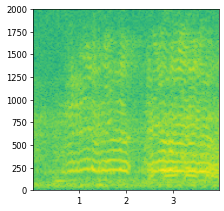

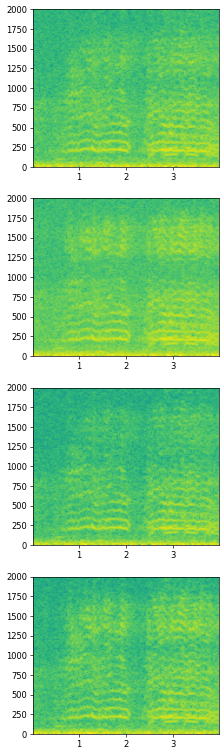

Event Record:
 Logger 7:7
 File Time 1528419100
 Event Time 43.1891156462585
 Length: 4.0
 Delay Matrix (AoA):
 [[  0  -5  -1   1]
 [  5   0   2  10]
 [  1  -2   0   4]
 [ -1 -10  -4   0]]
 SS: 4.2e-02 



In [158]:
event_i = 8
#event_i = 12

beam, real = events[event_i].debug_getsnippets(window=4096,Fs=44100)
#print(beam.shape)
#print(real.shape)
print("SS: ", events[event_i].SS)

fig = plt.figure(figsize=(4, 4), dpi=60)
viz.plotSpectrogram(beam)
plt.show()

fig = plt.figure(figsize=(4, 4*4), dpi=60)
viz.plotSpectrogram(real)
plt.show()

print(events[event_i])

In [134]:
tmp_path = "demo_event_"+str(event_i)
events[event_i].debug_savewav(tmp_path)

rawAudio.shape (4410000, 4)
snippet.shape (176400,)
snippet_raw_audio.shape (176400, 4)
!debug
saved into: /home/vitek/Vitek/python_codes/ox_audio_analysis_animals/BuffaloKillDemo/DeploymentData/BuffaloKillResampled/7_1528419100demo_event_8.wav


In [49]:
"""
Logger: 7 Time: 1528419100
rawAudio.shape (4410000, 4)
hpAudio.shape (4410000, 4)
lpAudio.shape (4410000, 4)
len(mask) 1077
mask[0] True
bf.shape (4410000,) len(events) 34

0 = 0 4096 (4096, 4)
4096 = 4096 8192 (4096, 4)
...
4407296 = 4407296 4411392 (2704, 4) < last one is shorter

"""

4407296 / 4096

1076.0

In [176]:
Fs = 44100
for event_i in range(len(events)):
    #print(dir(events[event_i]))
    print("logger,timestamp,time,len:", events[event_i].logger, events[event_i].coarse_timestamp, events[event_i].event_time*Fs, events[event_i].event_length*Fs, )
    

logger,timestamp,time,len: Logger 7:7) 1528419100 0.0 176400.0
logger,timestamp,time,len: Logger 7:7) 1528419100 782336.0 176400.0
logger,timestamp,time,len: Logger 7:7) 1528419100 1228800.0 176400.0
logger,timestamp,time,len: Logger 7:7) 1528419100 1458176.0 176400.0
logger,timestamp,time,len: Logger 7:7) 1528419100 1540096.0 176400.0
logger,timestamp,time,len: Logger 7:7) 1528419100 1622016.0 176400.0
logger,timestamp,time,len: Logger 7:7) 1528419100 1740800.0 176400.0
logger,timestamp,time,len: Logger 7:7) 1528419100 1822720.0 176400.0
logger,timestamp,time,len: Logger 7:7) 1528419100 1904639.9999999998 176400.0
logger,timestamp,time,len: Logger 7:7) 1528419100 1986560.0 176400.0
logger,timestamp,time,len: Logger 7:7) 1528419100 2068480.0 176400.0
logger,timestamp,time,len: Logger 7:7) 1528419100 2150400.0 176400.0
logger,timestamp,time,len: Logger 7:7) 1528419100 2232320.0 176400.0
logger,timestamp,time,len: Logger 7:7) 1528419100 2314240.0 176400.0
logger,timestamp,time,len: Logge

rawAudio.shape (4410000, 4)
hpAudio.shape (4410000, 4)
lpAudio.shape (4410000, 4)
Detected: 0 = 1253376 1257472 (4096, 4)
Detected: 1 = 1482752 1486848 (4096, 4)
Detected: 2 = 1646592 1650688 (4096, 4)
Detected: 3 = 1851392 1855488 (4096, 4)
Detected: 4 = 2027520 2031616 (4096, 4)
Detected: 5 = 2191360 2195456 (4096, 4)
Detected: 6 = 2355200 2359296 (4096, 4)
Detected: 7 = 2519040 2523136 (4096, 4)
Detected: 8 = 2981888 2985984 (4096, 4)
Detected: 9 = 3215360 3219456 (4096, 4)
Detected: 10 = 3379200 3383296 (4096, 4)
Detected: 11 = 3543040 3547136 (4096, 4)
Detected: 12 = 3706880 3710976 (4096, 4)
Detected: 13 = 3874816 3878912 (4096, 4)
Detected: 14 = 4079616 4083712 (4096, 4)
Detected: 15 = 4243456 4247552 (4096, 4)
len(mask) 1077
mask[0] False
got 16 with these...
rawAudio.shape (4410000, 4)
28.421224489795918 32.42122448979592
33.62249433106576 37.62249433106576
37.33768707482993 41.33768707482993
41.98167800453515 45.98167800453515
45.97551020408163 49.97551020408163
49.6907029478

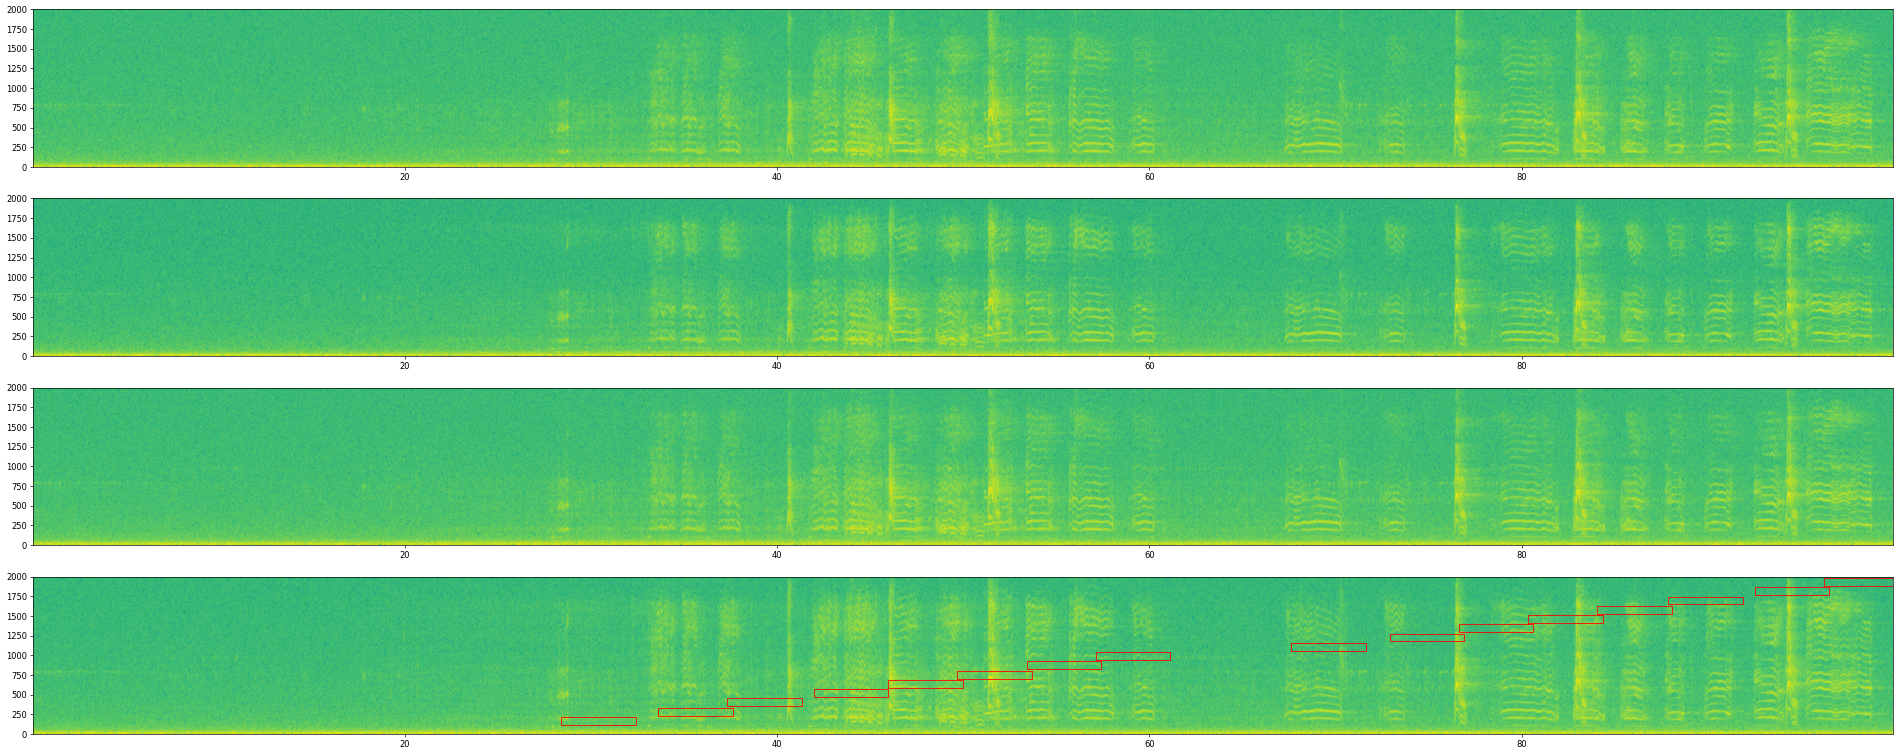

In [201]:
rerun = True
if rerun:
    coherence_threshold=5.9 # 5->still lot, 6-> none
    merge=40
    ev = CoherentEventSegmenter(coherence_threshold=coherence_threshold,merge=merge,event_length=4.0)
    bf,events = ev.extractEvents(logger,timestamp)
    print("got", len(events),"with these...")
    
from shumba import audiocore
import pylab as plt
import numpy as np
from matplotlib.patches import Rectangle

delete = False
## Load from files:
#fileopener = audiocore.AudioFile(None)
#rawAudio = fileopener._load_file(path_full_audio_track) # 4 channel

## Load from objects:
coarse_timestamp = 1528419100
tmp_logger = logger
rawAudio = audiocore.AudioFile(tmp_logger).loadAtTime(coarse_timestamp)
rawAudio = rawAudio.copy()

print("rawAudio.shape",rawAudio.shape)

viz = audiocore.AudioViz()

fig = plt.figure(figsize=(10*4, 4*4), dpi=60)

# Delete Data
if delete:
    for event_i in range(len(events)):    
        t_start = int( events[event_i].event_time*Fs )
        t_end = t_start + int( events[event_i].event_length*Fs )
        region = rawAudio[t_start:t_end, : ]
        rawAudio[t_start:t_end, : ] = np.ones_like(region)

viz.plotSpectrogram(rawAudio)

ax = plt.gca()

### Mark down event!
for event_i in range(len(events)):
    #print(dir(events[event_i]))
    #print("logger,timestamp,time,len:", events[event_i].logger, events[event_i].coarse_timestamp, events[event_i].event_time, events[event_i].event_length, )
    
    t_start_orig = events[event_i].event_time
    t_end_orig = t_start_orig+events[event_i].event_length
    print(t_start_orig,t_end_orig)
    
    #t_start = int( events[event_i].event_time*Fs )
    #t_end = t_start + int( events[event_i].event_length*Fs )
    #print(rawAudio[t_start:t_end, : ].shape)
    
    # Create a Rectangle patch
    tmp_k = (1+event_i)*(2000 / (len(events)+1))
    # xy, width, height
    rect = Rectangle((t_start_orig,tmp_k),4,100,linewidth=1,edgecolor='r',facecolor='none')
    ax.add_patch(rect)
    
    # Line:
    #plt.axvline(x=t_start_orig)
    #plt.axvline(x=t_end_orig)


plt.show()

#plt.figure(figsize=(8, 6), dpi=180)
#viz.plotSpectrolines(rawAudio,spacing=0.05,low_band=10,high_band=200,step=2)
#plt.show()

In [ ]:
# save all events
for event_i in range(len(events)):
    tmp_path = "demo_event_"+str(event_i)
    events[event_i].debug_savewav(tmp_path)

Now we run through each logger and each dataset to extract potential events. Change parameters such as the coherence_threshold (varies between 0 and 6) to alter sensitivity. 'merge' ignores multiple triggers within the merge window to stop creating multiple events with very similar timestamps. 

In [ ]:
#ev = extract.CoherentEventSegmenter(coherence_threshold=5.0,merge=20,event_length=4.0)
ev = CoherentEventSegmenter(coherence_threshold=5.0,merge=20,event_length=4.0)
for logger in world.loggers:
    audfile = audiocore.AudioFile(logger)
    pickfile = shumbacore.Pickler(logger.directory)
    for timestamp in coarse_timestamps:
        print("Logger:",logger.logger_id, "Time:",timestamp)
        bf,events = ev.extractEvents(logger,timestamp)
        print("bf.shape", bf.shape, "len(events)", len(events))        
        
        assert False
        # save the beamformed audio file
        audfile.save_file(bf,str(logger.logger_id)+"_" +str(timestamp)+".wav","beamformed")
        # save the events for later loading
        pickfile.save(events,str(logger.logger_id)+"_" +str(timestamp)+".events","events")
        for e in events:
            # save the extracted audio data
            filename = str(logger.logger_id)+"_" +str(timestamp) + "_" + str(int(e.event_time)) + ".wav"
            start_idx = int((e.event_time - e.event_length/2)*world.SAMPLE_RATE)
            stop_idx = int((e.event_time + e.event_length/2)*world.SAMPLE_RATE)
            snippet = bf[start_idx:stop_idx]
            audfile.save_file(snippet,filename,'extracts')

In [34]:
### EXPLORING...
#ev = extract.CoherentEventSegmenter(coherence_threshold=5.0,merge=20,event_length=4.0)
ev = CoherentEventSegmenter(coherence_threshold=5.0,merge=20,event_length=4.0)

print("coarse_timestamps", coarse_timestamps) # < this audiorecordings we have at our disposal now

for logger in world.loggers:
    audfile = audiocore.AudioFile(logger)
    pickfile = shumbacore.Pickler(logger.directory)
    print(logger , audfile.loadAtTime(coarse_timestamps[0]).shape , pickfile) # just handlers to loaded files ...
    
    for timestamp in coarse_timestamps:
        print("Logger:",logger.logger_id, "Time:",timestamp)
    
        bf,events = ev.extractEvents(logger,timestamp)
        print(len(bf)) # 4410000
        print(len(events)) # number of events ...
        #print(events[0])
        
        # save the beamformed audio file
        #audfile.save_file(bf,str(logger.logger_id)+"_" +str(timestamp)+".wav","beamformed")
        # save the events for later loading
        #pickfile.save(events,str(logger.logger_id)+"_" +str(timestamp)+".events","events")
        for e in events:
            # save the extracted audio data
            filename = str(logger.logger_id)+"_" +str(timestamp) + "_" + str(int(e.event_time)) + ".wav"
            print("saving event", e.SS, " into ", e.logger.directory, filename)
            start_idx = int((e.event_time - e.event_length/2)*world.SAMPLE_RATE)
            stop_idx = int((e.event_time + e.event_length/2)*world.SAMPLE_RATE)
            snippet = bf[start_idx:stop_idx]
            
            print(snippet.shape)
            #audfile.save_file(snippet,filename,'extracts')
        
        break
        
    break

coarse_timestamps [1528419100, 1528419200, 1528419300, 1528419400, 1528419500]
Logger 7:7) (4410000, 4) <shumba.shumbacore.Pickler object at 0x7fd87af75240>
Logger: 7 Time: 1528419100
4410000
34
saving event 0.0  into  /home/vitek/Vitek/python_codes/ox_audio_analysis_animals/BuffaloKillDemo/DeploymentData/BuffaloKillResampled/ 7_1528419100_0.wav
(0,)
saving event 0.002140192246651623  into  /home/vitek/Vitek/python_codes/ox_audio_analysis_animals/BuffaloKillDemo/DeploymentData/BuffaloKillResampled/ 7_1528419100_17.wav
(176400,)
saving event 0.01079836017439409  into  /home/vitek/Vitek/python_codes/ox_audio_analysis_animals/BuffaloKillDemo/DeploymentData/BuffaloKillResampled/ 7_1528419100_27.wav
(176400,)
saving event 0.012660635659228274  into  /home/vitek/Vitek/python_codes/ox_audio_analysis_animals/BuffaloKillDemo/DeploymentData/BuffaloKillResampled/ 7_1528419100_33.wav
(176400,)
saving event 0.017038823109115465  into  /home/vitek/Vitek/python_codes/ox_audio_analysis_animals/Buffalo

### Matcher

This tries to match up an event to all the other sound files. It determines the relative time-delay and also outputs a confidence that it has in the match. Again, here we are providing our own SpectralMatcher, but there are others in the core shumba library. 

The 'bounder' class (PositionInformedDelayBounder) bounds the maximum time-difference of arrival between two stations, given that we know where they are.

In [36]:
class CustomSpectralMatcher():

    def __init__(self):
        self.td = match.TimeDifferenceEstimator()
        
    def matchStreams(self,refStream,refFs,candidateStream,candidateFs):
        delay, confidence = self.td.delta_time(refStream,candidateStream,segmentFs=refFs,streamFs=candidateFs,
                                               fft_resolution=16384,fft_stride=2000,low_band=40,high_band=600)
        # create the TDOA record
        m = match.TDOArecord(delay,confidence)
        return m

In [ ]:
# our functions for the matcher
matcher =  CustomSpectralMatcher()
bounder = match.PositionInformedDelayBounder()
myLoader = match.LoadAtTimeWithFs()
loader = myLoader.load
# we need the pickler to save matches for later processing
pickfile = shumbacore.Pickler(logger_directory)
# Now we can process the data
for logger in world.loggers:
    for timestamp in coarse_timestamps:
        print("Processing logger",logger.logger_id,"at t =",timestamp)
        # extract all the events - this is quick, as it just loads up the one we did
        # in the previous step        
        bf,events = ev.extractEvents(logger,timestamp)
        # match all the events
        for event in events:
            # The matcher itself
            evMatch = match.EventMatcher(matcher,loader,bounder)
            # And now try and match an event
            try:
                matchRecord = evMatch.matchEventsResampled(event,world.loggers)
                # Save it
                filename = str(logger.logger_id)+"_" +str(timestamp) + "_" + str(int(event.event_time)) + ".match"
                pickfile.save(matchRecord,filename,"matches")
                print("Match at",str(int(event.event_time)),"s")
            except:
                print("something went wrong in the matching process")

In [43]:
### DEBUGING

# our functions for the matcher
matcher =  CustomSpectralMatcher()
bounder = match.PositionInformedDelayBounder()
#bounder = match.FixedDelayBounder()
myLoader = match.LoadAtTimeWithFs()
loader = myLoader.load
# we need the pickler to save matches for later processing
pickfile = shumbacore.Pickler(logger_directory)
# Now we can process the data
for logger in world.loggers:
    for timestamp in coarse_timestamps:
        print("Processing logger",logger.logger_id,"at t =",timestamp)
        
        # extract all the events - this is quick, as it just loads up the one we did
        # in the previous step        
        bf,events = ev.extractEvents(logger,timestamp)
        print("loaded orig file with ", len(bf), "samples and ", len(events), " detected events")
        
        # match all the events
        for event in events:
            # The matcher itself
            evMatch = match.EventMatcher(matcher,loader,bounder)
            # And now try and match an event
            print(evMatch)
            try:
                matchRecord = evMatch.matchEventsResampled(event,world.loggers)
                # Save it
                filename = str(logger.logger_id)+"_" +str(timestamp) + "_" + str(int(event.event_time)) + ".match"
                #pickfile.save(matchRecord,filename,"matches")
                print("Match at",str(int(event.event_time)),"s", filename)
            except:
                print("something went wrong in the matching process")
            
        break
    break

Processing logger 7 at t = 1528419100
loaded orig file with  4410000 samples and  34  detected events
distance 0.0 time 0.0 7 7
debug (0,) 44100.0 with (0,) 44100.0
something went wrong in the matching process
distance 0.0 time 0.0 7 7
debug (176400,) 44100.0 with (176400,) 44100.0
distance 517.8087385115124 time 1.5052579607892802 7 8


/home/vitek/anaconda3/envs/caracal_env/lib/python3.6/site-packages/scipy/signal/spectral.py:1963: UserWarning: nperseg = 16384 is greater than input length  = 0, using nperseg = 0
  .format(nperseg, input_length))


debug (176400,) 44100.0 with (309163,) 44100.0
distance 550.876152873294 time 1.601384165329343 7 10
debug (176400,) 44100.0 with (317642,) 44100.0
distance 1128.0068411889038 time 3.279089654618906 7 14
debug (176400,) 44100.0 with (465615,) 44100.0
Match at 17 s 7_1528419100_17.match
distance 0.0 time 0.0 7 7
debug (176400,) 44100.0 with (176400,) 44100.0
distance 517.8087385115124 time 1.5052579607892802 7 8
debug (176400,) 44100.0 with (309163,) 44100.0
distance 550.876152873294 time 1.601384165329343 7 10
debug (176400,) 44100.0 with (317642,) 44100.0
distance 1128.0068411889038 time 3.279089654618906 7 14
debug (176400,) 44100.0 with (465615,) 44100.0
Match at 27 s 7_1528419100_27.match
distance 0.0 time 0.0 7 7
debug (176400,) 44100.0 with (176400,) 44100.0
distance 517.8087385115124 time 1.5052579607892802 7 8
debug (176400,) 44100.0 with (309163,) 44100.0
distance 550.876152873294 time 1.601384165329343 7 10
debug (176400,) 44100.0 with (317642,) 44100.0
distance 1128.00684118

### Locator

This code below then takes in all the matches and then outputs a position. Depending on the likelihood, we can then determine whether this is a sound that has been localized with high or low confidence. Low likelihoods can be due to the event source being outside the convex hull of the loggers (and thus, fundamentally not locatable), or because there was poor matching across loggers.

10_1528419100_45.match MultiLogger Event Record:
:::Reference Event:
Event Record:
 Logger 10:10
 File Time 1528419100
 Event Time 45.88263038548753
 Length: 4.0
 Delay Matrix (AoA):
 [[ 0 -1  3  3]
 [ 1  0  4  8]
 [-3 -4  0  0]
 [-3 -8  0  0]]
 SS: 1.6e-02 
:::Matched Events:
Event Record:
 Logger 7:7
 File Time 1528419100
 Event Time 44.658140589569165
 Delay Matrix (AoA):
 [[  0  -7  -1   1]
 [  7   0   3  13]
 [  1  -3   0   5]
 [ -1 -13  -5   0]]
 SS: 5.2e-02 
TDOA Record:
 Match Time Delay: -1.2244897959183674
 Match Confidence: 0.42036355338308856
Event Record:
 Logger 8:8
 File Time 1528419100
 Event Time 44.79419501133787
 Delay Matrix (AoA):
 [[  0  -7 -12  -2]
 [  7   0  -1   3]
 [ 12   1   0   8]
 [  2  -3  -8   0]]
 SS: 3.0e-02 
TDOA Record:
 Match Time Delay: -1.08843537414966
 Match Confidence: 0.2713153053736298
Event Record:
 Logger 10:10
 File Time 1528419100
 Event Time 45.92798185941043
 Delay Matrix (AoA):
 [[ 0 -1  1  4]
 [ 1  0  4  6]
 [-1 -4  0  1]
 [-4 -6 -1  0

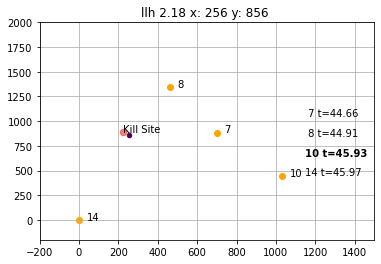

In [55]:
### DEBUG

myLoader = match.LoadAtTime()
loader = myLoader.load

# we need the pickler to load up a match record
pickfile = shumbacore.Pickler(logger_directory)
match_directory = os.path.join(logger_directory,"matches")
# trawl the match directory to get a list of files
match_list = []
for p in os.listdir(match_directory):
    if os.path.splitext(p)[1] == ".match":
        match_list.append(p)
        
import pylab
for matchX in match_list:
    matchRecord = pickfile.load(matchX,"matches")
    print(matchX, matchRecord)
    base_name = os.path.splitext(matchX)[0]
    full_path = os.path.join(logger_directory,"position")
    full_path = os.path.join(full_path,base_name)
    
    print(full_path)
    print("\n")

    # now for localization
    locationEstimator = position.DensePositionEstimator(world)
    locationEstimator.numPoints = 200 # on purpose change the random number of tried locations
    
    print("Robust Estimator", locationEstimator.numPoints, locationEstimator)
    x,y,llh = locationEstimator.estimateRobustPositionFromMatch(matchRecord,minStations=5)
    print(x,y,llh)
        
    print("Estimated Time of Arrival")
    times = locationEstimator.estimateTimeOfArrival(matchRecord,x,y)
    print(times)
    
    # pickle the toa for later
    positionRecord = {'x':x,'y':y,'llh':llh,'estTOA':times}
    #pickfile.save(positionRecord,base_name + ".position","position")
    # and now we can show it on the map
    
    pylab.clf()
    locationEstimator.plotLocation(numPoints=1)
    pylab.xlim(-200,1500)
    pylab.ylim(-200,2000)
    title_str = "llh {:0.2f} x: {:0.0f} y: {:0.0f} ".format(llh,x,y)
    pylab.title(title_str)
    # annotate the times
    x_coord = 1150
    y_coord = 1050
    y_step = -200
    for t, event in zip(times,matchRecord.matchedEvents):
        log_str = "{:2d} t={:0.2f}".format(event[0].logger.logger_id,t)
        if event[0].logger.logger_id == matchRecord.referenceEvent.logger.logger_id:
            pylab.text(x_coord,y_coord,log_str, weight='bold')
        else:
            pylab.text(x_coord,y_coord,log_str)
        y_coord = y_coord + y_step
    for target in world.targets:
        t_x,t_y = target.position.xy()
        pylab.scatter(t_x,t_y,c='red',s=40,label='Survey',alpha=0.5)
        pylab.text(t_x,t_y,"Kill Site")
    
    pylab.savefig(full_path + ".png")
    # match visualization
    matchRecord.plotMatches(loader)
    #pylab.savefig(full_path + "_viz.png")
    pylab.close()
    
    
    #"""
    
    break

In [ ]:
myLoader = match.LoadAtTime()
loader = myLoader.load

# we need the pickler to load up a match record
pickfile = shumbacore.Pickler(logger_directory)
match_directory = os.path.join(logger_directory,"matches")
# trawl the match directory to get a list of files
match_list = []
for p in os.listdir(match_directory):
    if os.path.splitext(p)[1] == ".match":
        match_list.append(p)
        
import pylab
for matchX in match_list:
    matchRecord = pickfile.load(matchX,"matches")
    print(matchX)
    base_name = os.path.splitext(matchX)[0]
    full_path = os.path.join(logger_directory,"position")
    full_path = os.path.join(full_path,base_name)
    # now for localization
    locationEstimator = position.DensePositionEstimator(world)
    print("Robust Estimator")
    x,y,llh = locationEstimator.estimateRobustPositionFromMatch(matchRecord,minStations=5)
    print(x,y,llh)
    print("Estimated Time of Arrival")
    times = locationEstimator.estimateTimeOfArrival(matchRecord,x,y)
    print(times)
    # pickle the toa for later
    positionRecord = {'x':x,'y':y,'llh':llh,'estTOA':times}
    pickfile.save(positionRecord,base_name + ".position","position")
    # and now we can show it on the map
    pylab.clf()
    locationEstimator.plotLocation(numPoints=1)
    pylab.xlim(-200,1500)
    pylab.ylim(-200,2000)
    title_str = "llh {:0.2f} x: {:0.0f} y: {:0.0f} ".format(llh,x,y)
    pylab.title(title_str)
    # annotate the times
    x_coord = 1150
    y_coord = 1050
    y_step = -200
    for t, event in zip(times,matchRecord.matchedEvents):
        log_str = "{:2d} t={:0.2f}".format(event[0].logger.logger_id,t)
        if event[0].logger.logger_id == matchRecord.referenceEvent.logger.logger_id:
            pylab.text(x_coord,y_coord,log_str, weight='bold')
        else:
            pylab.text(x_coord,y_coord,log_str)
        y_coord = y_coord + y_step
    for target in world.targets:
        t_x,t_y = target.position.xy()
        pylab.scatter(t_x,t_y,c='red',s=40,label='Survey',alpha=0.5)
        pylab.text(t_x,t_y,"Kill Site")
    
    pylab.savefig(full_path + ".png")
    # match visualization
    matchRecord.plotMatches(loader)
    pylab.savefig(full_path + "_viz.png")
    pylab.close()
    
    
